<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/ai_job_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import files
uploaded = files.upload()


Saving ai_job_dataset.csv to ai_job_dataset.csv


In [35]:
import pandas as pd

# Replace with your actual file name if different
df = pd.read_csv("ai_job_dataset.csv")

# Show first few rows
print(df.head())

# Show column names
print("\nColumns:", df.columns)

    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4         

In [36]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Drop rows with missing values (or handle appropriately)
df.dropna(inplace=True)

# Example transformation: create a new column
# Only if relevant columns exist
if "ai_jobs" in df.columns and "total_jobs" in df.columns:
    df["ai_job_ratio"] = df["ai_jobs"] / df["total_jobs"]

print("\nTransformed Data Sample:")
print(df.head())


Transformed Data Sample:
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India  

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a modern, clean theme
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)

<ipython-input-38-c8973011a3de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-38-c8973011a3de>:10: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


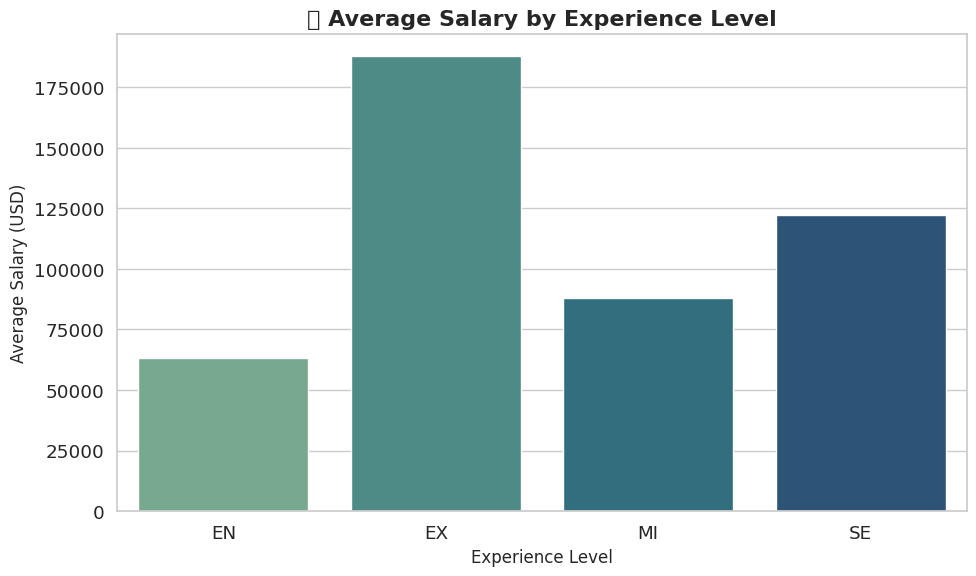

In [38]:
avg_salary_exp = df.groupby('experience_level')['salary_usd'].mean().reset_index()

sns.barplot(
    x='experience_level', y='salary_usd',
    data=avg_salary_exp, palette='crest'
)
plt.title("💼 Average Salary by Experience Level", fontsize=16, weight='bold')
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.tight_layout()
plt.show()



<ipython-input-39-b033f608d405>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-39-b033f608d405>:8: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


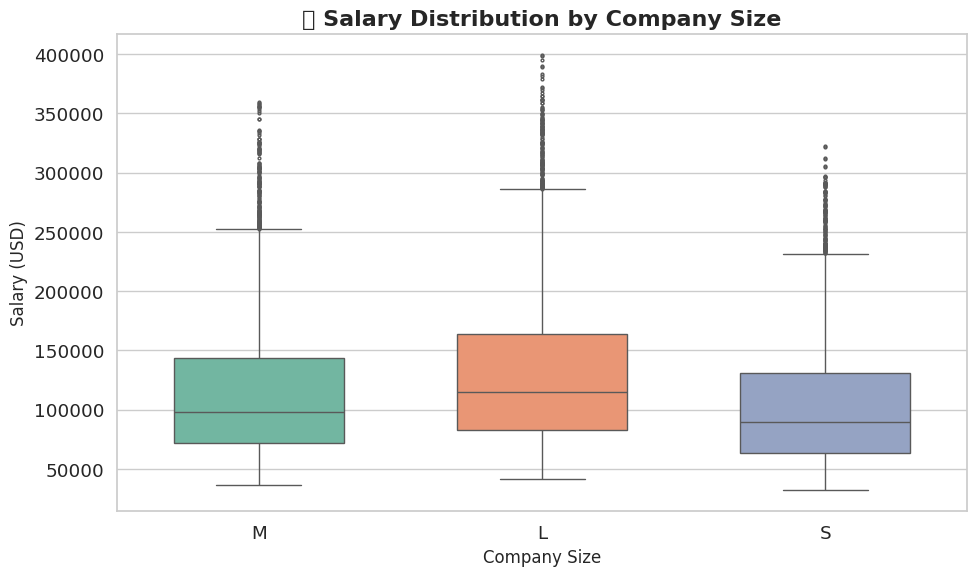

In [39]:
sns.boxplot(
    x='company_size', y='salary_usd',
    data=df, palette='Set2', width=0.6, fliersize=2
)
plt.title("🏢 Salary Distribution by Company Size", fontsize=16, weight='bold')
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-40-c13ae85d6a8e>:9: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


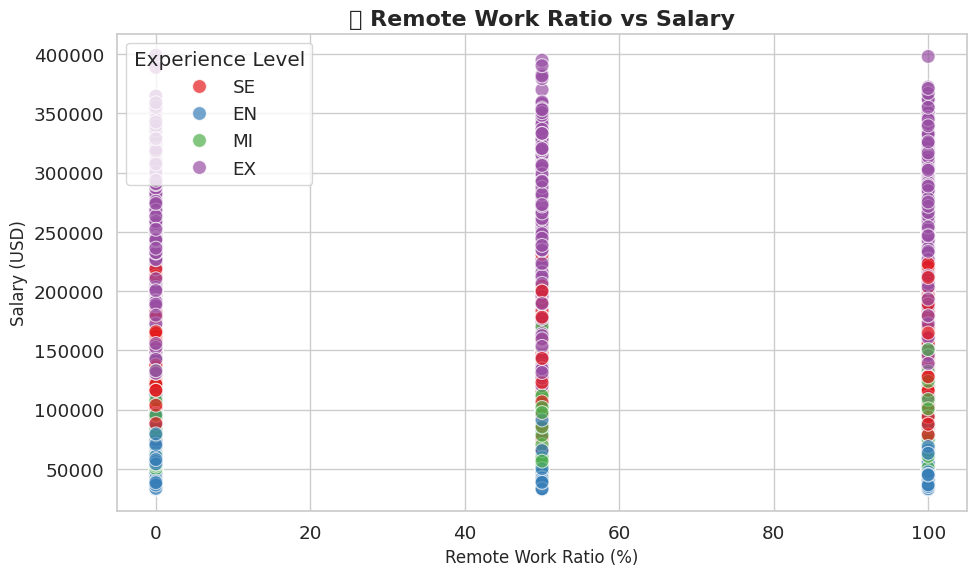

In [40]:
sns.scatterplot(
    x='remote_ratio', y='salary_usd', hue='experience_level',
    data=df, palette='Set1', alpha=0.7, edgecolor="w", s=100
)
plt.title("🌐 Remote Work Ratio vs Salary", fontsize=16, weight='bold')
plt.xlabel("Remote Work Ratio (%)", fontsize=12)
plt.ylabel("Salary (USD)", fontsize=12)
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()
